In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

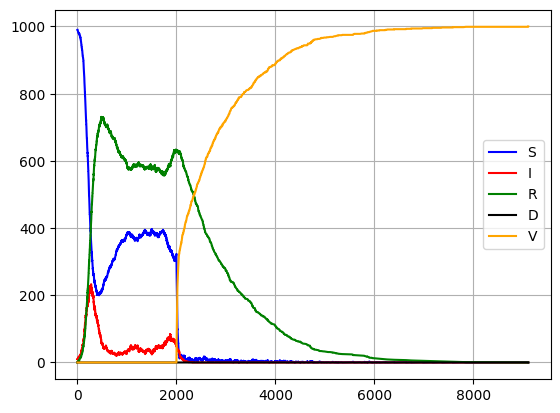

(0, 0, 0, 0)

In [9]:
N = 1000
S = 990
I = 10
R = 0
D = 0
V = 0
time = 0

beta = 0.04
gamma = 0.015
delta = 0.001
mu = 0.00001
vu = 0.

S_list = [S]
I_list = [I]
R_list = [R]
D_list = [D]
V_list = [V]
t_list = [time]

time_vaccine = 2000

while time < 10000:
    if time >= time_vaccine:
        vu = 0.05
    rateSI = beta*S*I/N
    rateIR = gamma*I
    rateRS = delta*R
    rateID = mu*I
    rateSV = vu*S


    totRate = rateSI + rateIR + rateRS + rateID + rateSV
    if(totRate == 0):
        break

    t = stats.expon.rvs(scale = 1/totRate)
    time += t
    probs = np.array([rateSI, rateIR, rateRS, rateID, rateSV])/totRate
    event = np.random.choice(5, 1, p = probs)

    if event == 0:
        S = S - 1
        I = I + 1
    elif event == 1:
        I = I - 1
        R = R + 1
    elif event == 2:
        R = R - 1
        S = S + 1
    elif event == 3:
        I = I - 1
        D = D + 1
    else:
        S = S - 1
        V = V + 1

    S_list.append(S)
    I_list.append(I)
    R_list.append(R)
    D_list.append(D)
    V_list.append(V)
    t_list.append(time)

plt.figure()
plt.plot(t_list, S_list, color = 'blue', label = 'S')
plt.plot(t_list, I_list, color = 'red', label = 'I')
plt.plot(t_list, R_list, color = 'green', label = 'R')
plt.plot(t_list, D_list, color = 'black', label = 'D')
plt.plot(t_list, V_list, color = 'orange', label = 'V')
plt.grid()
plt.legend()
plt.show()
S, I, R, D

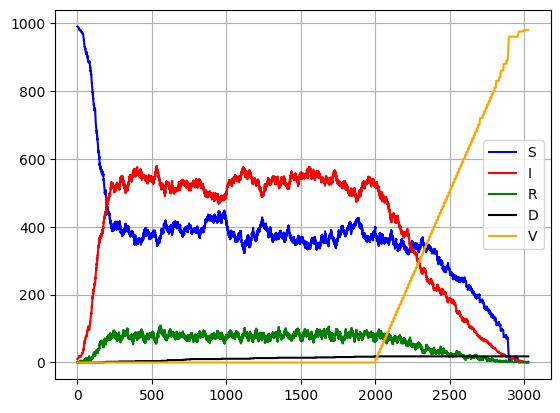

(2, 0, 0, 18, 980)

In [33]:
N = 1000
S = 990
I = 10
R = 0
D = 0
V = 0
time = 0

beta = 0.04
gamma = 0.015
delta = 0.1
mu = 0.00001

S_list = [S]
I_list = [I]
R_list = [R]
D_list = [D]
V_list = [V]
t_list = [time]

time_vaccine = 2000
delta_vaccine = 10
number_vaccine = 10
vac_count = 0
vaccination_completed = False

while time < 10000:
    rateSI = beta*S*I/N
    rateIR = gamma*I
    rateRS = delta*R
    rateID = mu*I


    totRate = rateSI + rateIR + rateRS + rateID
    if(totRate == 0):
        break

    t = stats.expon.rvs(scale = 1/totRate)
    time += t
    probs = np.array([rateSI, rateIR, rateRS, rateID])/totRate
    event = np.random.choice(4, 1, p = probs)

    if event == 0:
        S = S - 1
        I = I + 1
    elif event == 1:
        I = I - 1
        R = R + 1
    elif event == 2:
        R = R - 1
        S = S + 1
    else:
        I = I - 1
        D = D + 1

    if time >= (time_vaccine + delta_vaccine*vac_count) and not vaccination_completed:
        for i in range(int((time - time_vaccine - delta_vaccine*vac_count)%delta_vaccine + 1)):
            deltaV = np.min([S, number_vaccine])
            V += deltaV
            S = np.max([0, S - deltaV])
            if(V == N - D):
                vaccination_completed = True
            vac_count += 1
        
    S_list.append(S)
    I_list.append(I)
    R_list.append(R)
    D_list.append(D)
    V_list.append(V)
    t_list.append(time)

plt.figure()
plt.plot(t_list, S_list, color = 'blue', label = 'S')
plt.plot(t_list, I_list, color = 'red', label = 'I')
plt.plot(t_list, R_list, color = 'green', label = 'R')
plt.plot(t_list, D_list, color = 'black', label = 'D')
plt.plot(t_list, V_list, color = 'orange', label = 'V')
plt.grid()
plt.legend()
plt.show()
S, I, R, D, V